-----------------------------------------------------
Lab 5: Clustering Analysis on Wine Dataset
Name: Manasa Kakarla
Course: MSCS 634 - Data Mining
-----------------------------------------------------

In [1]:
# Step 1: Data Preparation and Exploration
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='Target')

In [3]:
# Explore dataset
print(X.head())
print(X.info())
print(X.describe())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized.")

Features standardized.


In [5]:
# Step 2: Hierarchical Clustering
# --------------------------------
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

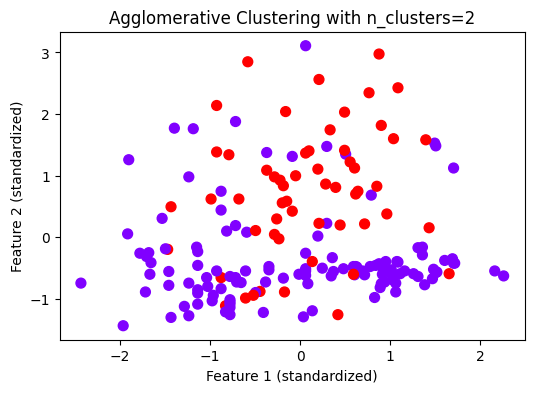

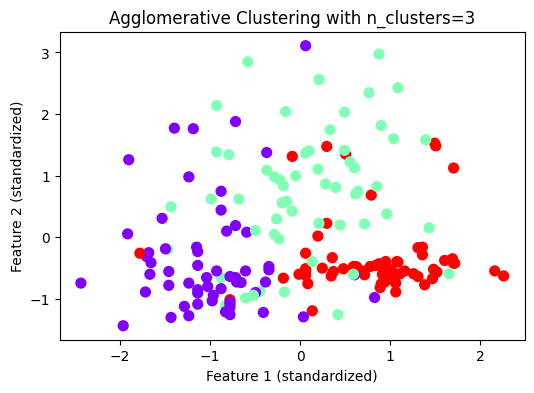

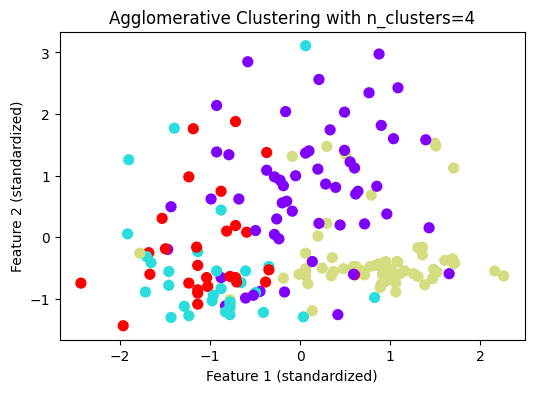

In [6]:
# Test different n_clusters
n_clusters_list = [2, 3, 4]
for n in n_clusters_list:
    hc = AgglomerativeClustering(n_clusters=n)
    labels = hc.fit_predict(X_scaled)
    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='rainbow', s=50)
    plt.title(f'Agglomerative Clustering with n_clusters={n}')
    plt.xlabel('Feature 1 (standardized)')
    plt.ylabel('Feature 2 (standardized)')
    plt.show()

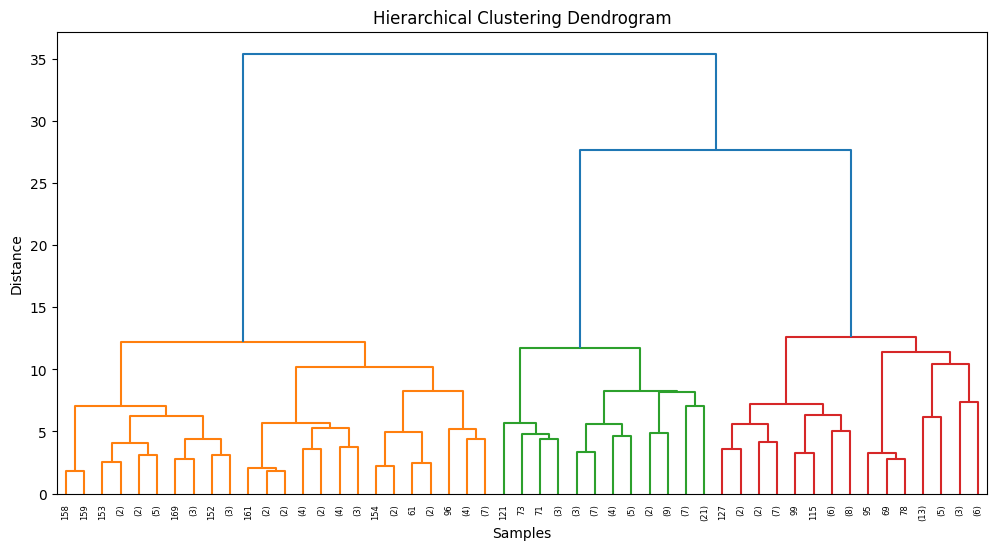

In [7]:
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [8]:
# Step 3: DBSCAN Clustering
# --------------------------
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

In [9]:
# Experiment with eps and min_samples
eps_values = [1.0, 1.5, 2.0]
min_samples_values = [3, 5]

DBSCAN eps=1.0, min_samples=3
Clusters: 0, Noise points: 178
Silhouette: nan, Homogeneity: 0.000, Completeness: 1.000


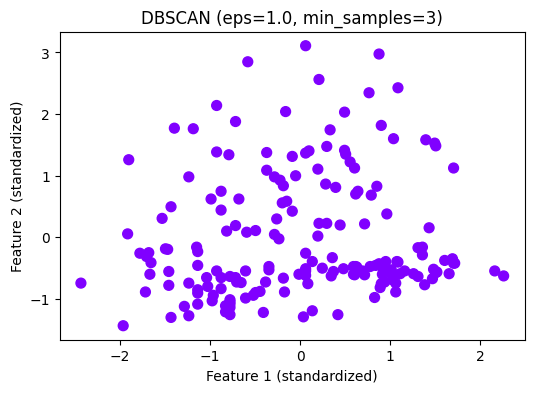

DBSCAN eps=1.0, min_samples=5
Clusters: 0, Noise points: 178
Silhouette: nan, Homogeneity: 0.000, Completeness: 1.000


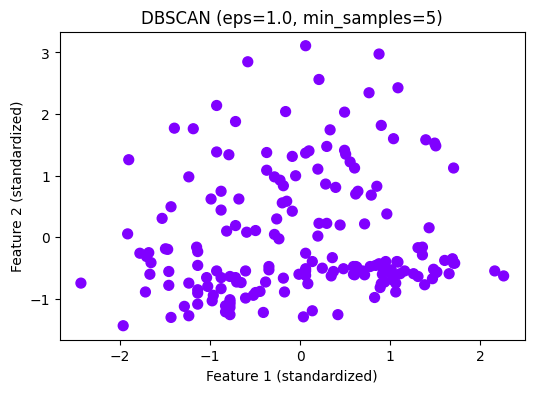

DBSCAN eps=1.5, min_samples=3
Clusters: 8, Noise points: 147
Silhouette: -0.277, Homogeneity: 0.189, Completeness: 0.251


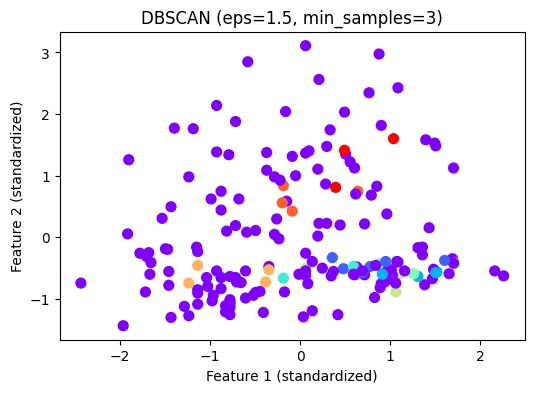

DBSCAN eps=1.5, min_samples=5
Clusters: 0, Noise points: 178
Silhouette: nan, Homogeneity: 0.000, Completeness: 1.000


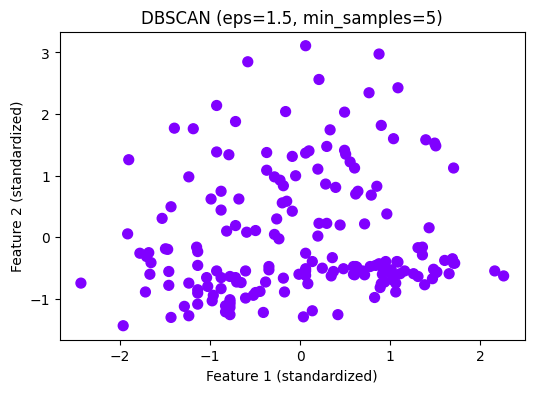

DBSCAN eps=2.0, min_samples=3
Clusters: 5, Noise points: 64
Silhouette: 0.031, Homogeneity: 0.442, Completeness: 0.372


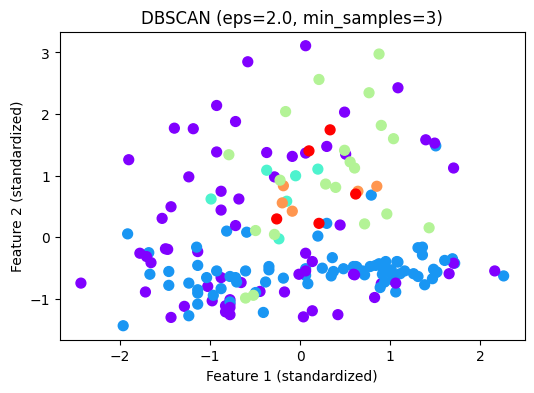

DBSCAN eps=2.0, min_samples=5
Clusters: 5, Noise points: 85
Silhouette: -0.033, Homogeneity: 0.362, Completeness: 0.325


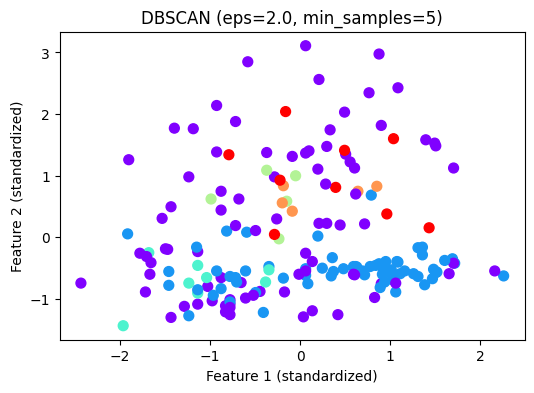

In [10]:
for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        db_labels = db.fit_predict(X_scaled)
        
        n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
        n_noise = list(db_labels).count(-1)
        
        if n_clusters > 1:
            sil_score = silhouette_score(X_scaled, db_labels)
        else:
            sil_score = np.nan
            
        homo_score = homogeneity_score(y, db_labels)
        comp_score = completeness_score(y, db_labels)
        
        print(f"DBSCAN eps={eps}, min_samples={min_s}")
        print(f"Clusters: {n_clusters}, Noise points: {n_noise}")
        print(f"Silhouette: {sil_score:.3f}, Homogeneity: {homo_score:.3f}, Completeness: {comp_score:.3f}")
        
        # Scatter plot
        plt.figure(figsize=(6,4))
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_labels, cmap='rainbow', s=50)
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_s})')
        plt.xlabel('Feature 1 (standardized)')
        plt.ylabel('Feature 2 (standardized)')
        plt.show()

In [11]:
# Step 4: Analysis and Insights
# ------------------------------
print("""
Observations:
1. Hierarchical clustering shows clear group separation and a dendrogram reveals natural clusters.
2. DBSCAN can detect noise points, but results are sensitive to eps and min_samples.
3. Silhouette, homogeneity, and completeness scores help evaluate clustering quality.
4. Hierarchical is better for structured clusters; DBSCAN is better for irregular shapes or noisy data.
""")


Observations:
1. Hierarchical clustering shows clear group separation and a dendrogram reveals natural clusters.
2. DBSCAN can detect noise points, but results are sensitive to eps and min_samples.
3. Silhouette, homogeneity, and completeness scores help evaluate clustering quality.
4. Hierarchical is better for structured clusters; DBSCAN is better for irregular shapes or noisy data.

